In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import csv file and put in a data frame
filepath = "../data/cleaned_vehicle_data.csv"

ev_df = pd.read_csv(filepath)

ev_df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Latitude,Longitude
0,WAUTPBFF4H,King,Seattle,WA,98126,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,47.544680,-122.374105
1,WAUUPBFF2J,Thurston,Olympia,WA,98502,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,47.059252,-122.943445
2,5YJSA1E22H,Thurston,Lacey,WA,98516,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),210,47.083975,-122.780830
3,1C4JJXP62M,Thurston,Tenino,WA,98589,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),25,46.856085,-122.854030
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),308,46.597394,-120.524012


In [3]:
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86489 entries, 0 to 86488
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VIN (1-10)             86489 non-null  object 
 1   County                 86489 non-null  object 
 2   City                   86489 non-null  object 
 3   State                  86489 non-null  object 
 4   Postal Code            86489 non-null  int64  
 5   Model Year             86489 non-null  int64  
 6   Make                   86489 non-null  object 
 7   Model                  86489 non-null  object 
 8   Electric Vehicle Type  86489 non-null  object 
 9   Electric Range         86489 non-null  int64  
 10  Latitude               86489 non-null  float64
 11  Longitude              86489 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 7.9+ MB


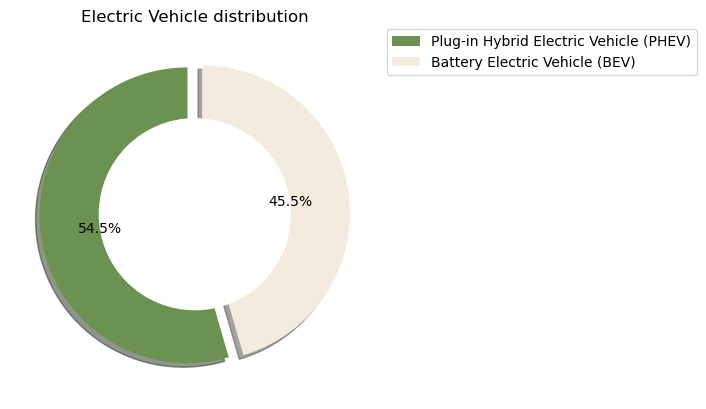

In [120]:
#Distributions of the data 
#Labels for the sections of our pie chart
labels = ev_df["Electric Vehicle Type"].unique()

# The values of each section of the pie chart
values = ev_df["Electric Vehicle Type"].value_counts()
colors = ['#6B9250', '#F2EBDE','#022200', '#D6CFEE', "#E7E900"]

# Create the pie chart

values.plot(kind='pie', labels=labels, colors = colors, explode=[0.05, 0.05], shadow=True, autopct='%1.1f%%', 
            legend = True,  title = 'Electric Vehicle distribution', labeldistance=None, ylabel='',startangle=90)
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)





<Axes: title={'center': 'Electric Vehicles Registered by Year'}, xlabel='Model Year'>

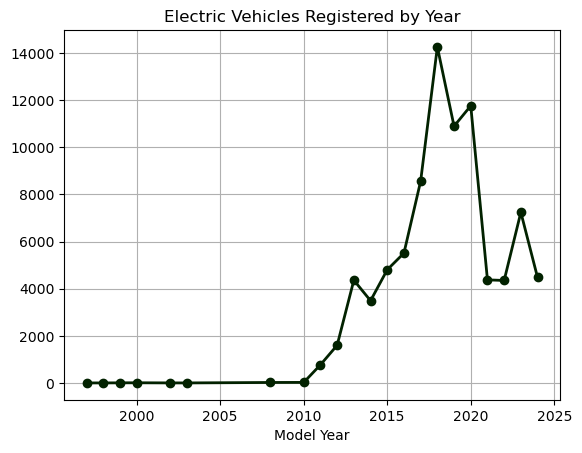

In [134]:
#cars registration by years (make)
cars_years = ev_df.groupby('Model Year').size()
colors = ['#022200','#6B9250', '#F2EBDE', '#D6CFEE', "#E7E900"]
cars_years.plot(kind='line', marker="o",color= colors, linewidth=2, grid = True, linestyle = '-', title = "Electric Vehicles Registered by Year")


In [38]:
#create a pivot table to show the vehicle distribution by make 
cols = ["Make"]
make = pd.pivot_table(ev_df, index='Make', aggfunc='size', columns = cols)
pivot_table.sort_values(ascending = False)

Make
TESLA                   25429
NISSAN                  10742
CHEVROLET                9424
TOYOTA                   6169
BMW                      5615
JEEP                     4678
FORD                     3907
KIA                      3888
CHRYSLER                 3039
VOLVO                    2824
AUDI                     2168
VOLKSWAGEN               1070
MITSUBISHI                979
HYUNDAI                   954
HONDA                     827
FIAT                      783
PORSCHE                   717
DODGE                     607
MAZDA                     501
MERCEDES-BENZ             458
MINI                      342
SMART                     269
LINCOLN                   269
JAGUAR                    206
LEXUS                     201
POLESTAR                  143
CADILLAC                   87
SUBARU                     65
LAND ROVER                 57
ALFA ROMEO                 42
FISKER                     10
AZURE DYNAMICS              8
TH!NK                       5
BENTL

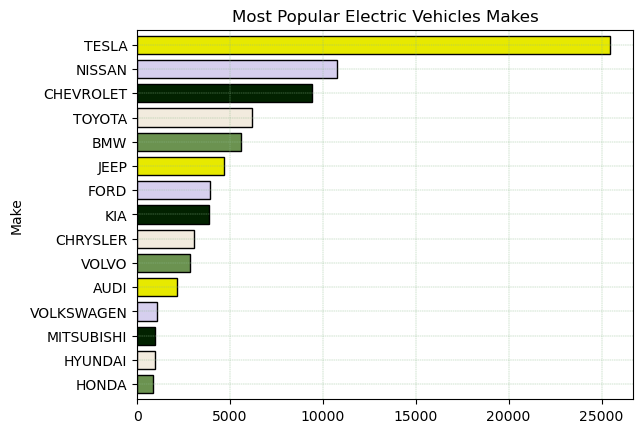

In [146]:
#most popular cars registration (make)
make_dist = ev_df["Make"].value_counts()
make_dist = make_dist.sort_values().tail(15)
colors = ['#6B9250', '#F2EBDE','#022200', '#D6CFEE', "#E7E900"]
#create the bar chart

make_dist.plot.barh(width=0.75, title = "Most Popular Electric Vehicles Makes",  edgecolor = 'black',   color=colors)
plt.ylabel = "Make"
plt.xlabel = "Count"
plt.grid(color='darkseagreen', linestyle='--', linewidth=0.3)
plt.show()


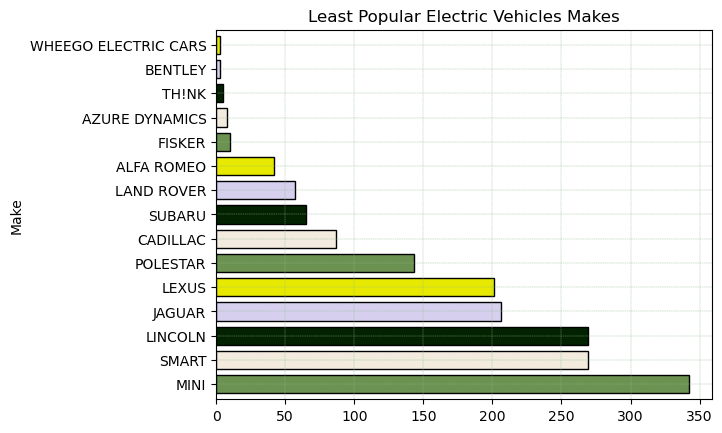

In [147]:
#least popular cars registration (make)
make_dist = ev_df["Make"].value_counts()
make_dist = make_dist.tail(15)
colors = ['#6B9250', '#F2EBDE','#022200', '#D6CFEE', "#E7E900"]
#create the bar chart

make_dist.plot.barh(width=0.75, title = "Least Popular Electric Vehicles Makes",   color=colors,  edgecolor = 'black')
plt.ylabel = "Make"
plt.xlabel = "Count"
plt.grid(color='darkseagreen', linestyle='--', linewidth=0.3)
plt.show()


In [48]:
#create a pivot table to show the vehicle distribution by make 
pivot_table = ev_df.pivot_table(index='Model', aggfunc='size')
pivot_table.sort_values(ascending = False)

Model
MODEL 3        13763
LEAF           10742
MODEL S         5971
VOLT            4785
BOLT EV         4394
               ...  
FLYING SPUR        2
BENTAYGA           1
918                1
750E               1
S-10 PICKUP        1
Length: 97, dtype: int64

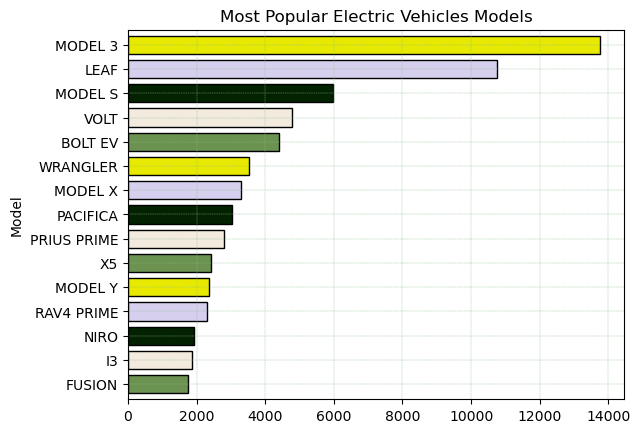

In [148]:
#most popular cars registration (model)
model_dist = ev_df["Model"].value_counts()
model_dist = model_dist.sort_values().tail(15)
colors = ['#6B9250', '#F2EBDE','#022200', '#D6CFEE', "#E7E900"]
#create the bar chart

model_dist.plot.barh(width=0.75, title = "Most Popular Electric Vehicles Models",   color=colors, edgecolor = 'black')
plt.ylabel = "Make"
plt.xlabel = "Count"
plt.grid(color='darkseagreen', linestyle='--', linewidth=0.3)
plt.show()


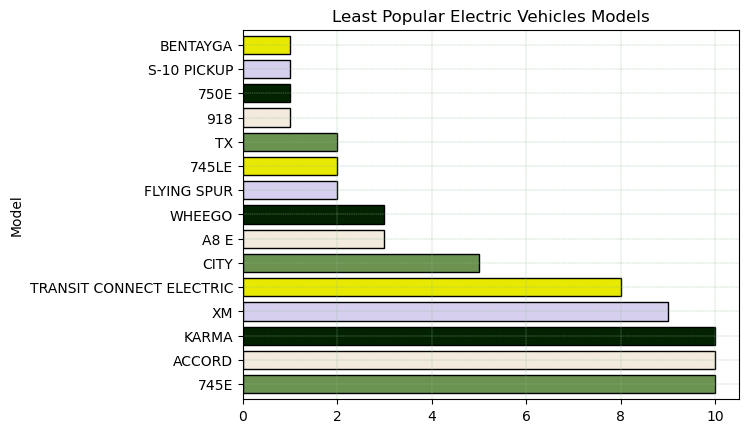

In [149]:
#least popular cars registration (make)
model_dist = ev_df["Model"].value_counts()
model_dist = model_dist.tail(15)
colors = ['#6B9250', '#F2EBDE','#022200', '#D6CFEE', "#E7E900"]
#create the bar chart

model_dist.plot.barh(width=0.75, title = "Least Popular Electric Vehicles Models",   edgecolor = 'black', color=colors)
plt.ylabel = "Make"
plt.xlabel = "Count"
plt.grid(color='darkseagreen', linestyle='--', linewidth=0.3)
plt.show()
